In [3]:
import requests

url = "https://api.apitube.io/v1/news/everything"

querystring = {"per_page":"1", 
               "api_key":"api_live_yde4AawlEFido2rU6WqpBIObavjH9MeATRDtPN5euNkhreVhjsVliohwaI",
               "source.domain": "cnn.com",
               "category.name": "politics,technology,business",
               "sentiment.overall.polarity": "positive,neutral"
               
               }

response = requests.request("GET", url, params=querystring)

print(response.text)

{"status":"ok","limit":1,"path":"https://api.apitube.io/v1/news/everything?per_page=1\u0026api_key=api_live_yde4AawlEFido2rU6WqpBIObavjH9MeATRDtPN5euNkhreVhjsVliohwaI\u0026source.domain=cnn.com\u0026category.name=politics%2Ctechnology%2Cbusiness\u0026sentiment.overall.polarity=positive%2Cneutral","page":1,"has_next_pages":true,"next_page":"https://api.apitube.io/v1/news/everything?api_key=api_live_yde4AawlEFido2rU6WqpBIObavjH9MeATRDtPN5euNkhreVhjsVliohwaI\u0026category.name=politics%2Ctechnology%2Cbusiness\u0026page=2\u0026per_page=1\u0026sentiment.overall.polarity=positive%2Cneutral\u0026source.domain=cnn.com","next_page_cursor":"AoIqMzAwNjY0NzUxMnjW6fmFkgM=","has_previous_page":false,"previous_page":"","export":{"json":"https://api.apitube.io/v1/news/everything?api_key=api_live_yde4AawlEFido2rU6WqpBIObavjH9MeATRDtPN5euNkhreVhjsVliohwaI\u0026category.name=politics%2Ctechnology%2Cbusiness\u0026export=json\u0026per_page=1\u0026sentiment.overall.polarity=positive%2Cneutral\u0026source.do

In [9]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=financial_markets,economy_fiscal,economy_monetary,economy_macro,finance&apikey=U28SRMOO833EB9HN'
r = requests.get(url)
data = r.json()

print(data)

{'items': '0', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': []}


In [32]:
import worldnewsapi

# Initial SDK configuration
newsapi_configuration = worldnewsapi.Configuration(api_key={'apiKey': '18ba185a68f447ab82a8d90c13ad70b8'})

try:
	newsapi_instance = worldnewsapi.NewsApi(worldnewsapi.ApiClient(newsapi_configuration))

	max_results = 2   # replace with your maximum
	offset = 0
	all_results = []

	while len(all_results) < max_results:

		request_count = min(100, max_results - len(all_results)) # request 100 or the remaining number of articles

		response = newsapi_instance.search_news(
			text='finance',
            source_country = "us",
			language='en',
			earliest_publish_date='2025-05-01',
			latest_publish_date='2025-05-06',
			categories='politics,business,technology',
			sort="publish-time",
			sort_direction="desc",
			min_sentiment=-0.8,
			max_sentiment=0.8,
			offset=offset,
			number=request_count)

		print("Retrieved " + str(len(response.news)) + " articles. Offset: " + str(offset) + "/" + str(max_results) +
			  ". Total available: " + str(response.available) + ".")

		if len(response.news) == 0:
			break

		all_results.extend(response.news)
		offset += 100

except worldnewsapi.ApiException as e:
	print("Exception when calling NewsApi->search_news: %s\n" % e)


Retrieved 2 articles. Offset: 0/2. Total available: 153.


In [33]:
for article in all_results:
    print("\nTitle: " + str(article.title))
    print("URL: " + str(article.url))
    print("Sentiment: " + str(article.sentiment))
    print("Text: " + str(article.text[:80]) + "...")


Title: Texas Governor Abbott Approves New School Choice Legislation
URL: https://internewscast.com/local-news/texas-governor-abbott-approves-new-school-choice-legislation/
Sentiment: -0.018
Text: AUSTIN (Nexstar) — Texas Gov. Greg Abbott signed Senate Bill 2, the education sa...

Title: BURROWING IN: How 8 Biden Political Appointees Tried to Secure Spots in the Permanent Bureaucracy
URL: https://www.dailysignal.com/2025/05/04/burrowing-how-8-biden-political-appointees-tried-secure-spots-permanent-bureaucracy/
Sentiment: -0.22
Text: Left-leaning federal bureaucrats aim to oppose President Donald Trump from withi...


Using CSV file: BTCUSD.csv
Strategy parameters: {'annualized_return': 0.15, 'annualized_volatility': 0.01, 'correlation': 0.35, 'initial_equity': 100000}
Original CSV columns: ['DateOpen', 'Open', 'Close', 'High', 'Low', 'Spread']

Sample data (first 3 rows):
              DateOpen     Open    Close     High      Low  Spread
0  2018-03-29 13:44:00  7484.45  7484.45  7484.45  7484.45    -9.7
1  2018-05-17 12:51:00  8250.00  8250.00  8250.00  8247.50    22.0
2  2018-05-17 12:52:00  8252.50  8252.50  8255.00  8252.50    23.0
Processed 2018 days of Bitcoin data
Date range: 2018-03-29 to 2024-11-28


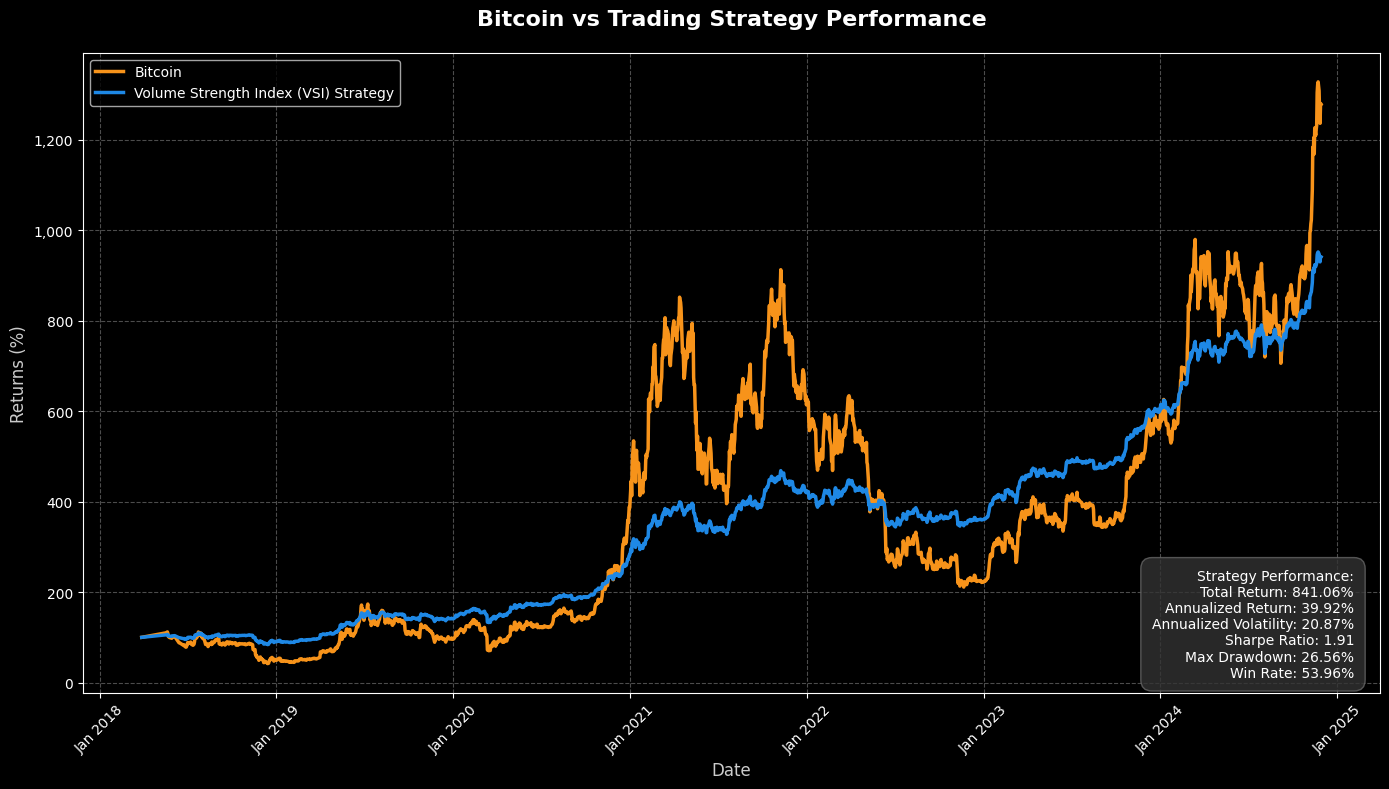


Strategy Performance Metrics:
Total Return: 841.06%
Annualized Return: 39.92%
Annualized Volatility: 20.87%
Sharpe Ratio: 1.91%
Max Drawdown: 26.56%
Win Rate: 53.96%


In [100]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import datetime as dt
import pandas as pd
from typing import Dict, List, Tuple, Optional

def fetch_btc_price_data(csv_path: str = "BTCUSD.csv") -> pl.DataFrame:
    """
    Read Bitcoin price data from the provided CSV file.
    
    Parameters:
    -----------
    csv_path: Path to the CSV file containing Bitcoin price data
    
    Returns:
    --------
    Polars DataFrame with processed Bitcoin price data
    """
    try:
        # Read the CSV file with pandas first to examine and handle the data
        # This can help us better understand the structure
        pd_df = pd.read_csv(csv_path)
        print("Original CSV columns:", pd_df.columns.tolist())
        
        # Print sample data
        print("\nSample data (first 3 rows):")
        print(pd_df.head(3))
        
        # Convert DateOpen to datetime manually
        pd_df['date'] = pd.to_datetime(pd_df['DateOpen'])
        
        # Extract just the date part without the time
        pd_df['date'] = pd_df['date'].dt.date
        
        # Convert back to polars
        df = pl.from_pandas(pd_df)
        
        # Select and rename relevant columns
        df = df.select([
            pl.col("date"),
            pl.col("Close").alias("price")
        ])
        
        # Ensure date is actually a date type
        df = df.with_columns(
            pl.col("date").cast(pl.Date).alias("date")
        )
        
        # Sort by date
        df = df.sort("date")
        
        # Resample to daily data since the original data might have multiple entries per day
        df_daily = df.group_by("date").agg(
            pl.col("price").last().alias("price")
        )
        
        # Calculate normalized price (starting at 100)
        first_price = df_daily["price"][0]
        df_daily = df_daily.with_columns(
            (pl.col("price") / first_price * 100).alias("normalized_price")
        )
        
        print(f"Processed {len(df_daily)} days of Bitcoin data")
        print(f"Date range: {df_daily['date'].min()} to {df_daily['date'].max()}")
        
        return df_daily
    
    except Exception as e:
        print(f"Error reading Bitcoin price data: {e}")
        print("Traceback:", e.__traceback__)
        
        # If there's an error, create a fallback dataset with example data
        print("Using fallback data...")
        
        # Bitcoin price data (based on historical information)
        btc_price_data = [
            # 2018
            {"date": "2018-01-01", "price": 13000},
            {"date": "2018-03-01", "price": 10000},
            {"date": "2018-06-01", "price": 7500},
            {"date": "2018-09-01", "price": 6500},
            {"date": "2018-12-01", "price": 3700},
            # 2019
            {"date": "2019-01-01", "price": 3700},
            {"date": "2019-04-01", "price": 5000},
            {"date": "2019-06-01", "price": 8000},
            {"date": "2019-07-01", "price": 13000},
            {"date": "2019-09-01", "price": 10000},
            {"date": "2019-12-01", "price": 7200},
            # 2020
            {"date": "2020-01-01", "price": 7200},
            {"date": "2020-02-01", "price": 10000},
            {"date": "2020-03-01", "price": 3850},  # March crash
            {"date": "2020-05-01", "price": 9000},
            {"date": "2020-10-01", "price": 11000},
            {"date": "2020-12-01", "price": 29000},
            # 2021
            {"date": "2021-01-01", "price": 30000},
            {"date": "2021-04-01", "price": 60000},
            {"date": "2021-07-01", "price": 40000},
            {"date": "2021-11-01", "price": 69000},  # ATH in 2021
            {"date": "2021-12-01", "price": 50000},
            # 2022
            {"date": "2022-01-01", "price": 47000},
            {"date": "2022-05-01", "price": 30000},
            {"date": "2022-08-01", "price": 24000},
            {"date": "2022-12-01", "price": 16500},
            # 2023
            {"date": "2023-01-01", "price": 16500},
            {"date": "2023-06-01", "price": 30000},
            {"date": "2023-12-01", "price": 42000},
            # 2024
            {"date": "2024-01-01", "price": 42000},
            {"date": "2024-01-11", "price": 49000},  # ETF approval
            {"date": "2024-03-14", "price": 73000},  # New ATH
            {"date": "2024-04-19", "price": 64000},  # Bitcoin halving
            {"date": "2024-09-01", "price": 60000},
            {"date": "2024-12-05", "price": 100000}  # Breaking $100k
        ]
        
        # Convert to Polars DataFrame
        df = pl.DataFrame(btc_price_data)
        
        # Convert date strings to datetime objects
        df = df.with_columns(
            pl.col("date").str.to_date("%Y-%m-%d").alias("date")
        )
        
        # Sort by date
        df = df.sort("date")
        
        # Calculate normalized price (starting at 100)
        first_price = df["price"][0]
        df = df.with_columns(
            (pl.col("price") / first_price * 100).alias("normalized_price")
        )
        
        return df

def generate_strategy_equity_curve(
    btc_df: pl.DataFrame,
    strategy_params: Dict[str, float]
) -> pl.DataFrame:
    """
    Generate a random equity curve for a trading strategy based on given parameters.
    
    Parameters:
    -----------
    btc_df: Polars DataFrame with Bitcoin price data
    strategy_params: Dictionary with strategy parameters
        - annualized_return: Target annualized return (e.g., 0.25 for 25%)
        - annualized_volatility: Target annualized volatility (e.g., 0.3 for 30%)
        - correlation: Correlation with Bitcoin returns (e.g., 0.65 for 65%)
        - initial_equity: Starting equity (e.g., 10000 for $10,000)
    
    Returns:
    --------
    Polars DataFrame with strategy equity curve
    """
    # Extract parameters with default values
    annual_return = strategy_params.get("annualized_return", 0.25)
    annual_vol = strategy_params.get("annualized_volatility", 0.30)
    correlation = strategy_params.get("correlation", 0.65)
    initial_equity = strategy_params.get("initial_equity", 10000)
    
    # Convert to pandas for easier date handling
    btc_pd = btc_df.to_pandas()
    
    # Calculate Bitcoin returns
    btc_pd['btc_return'] = btc_pd['price'].pct_change().fillna(0)
    
    # Generate strategy returns
    np.random.seed(42)  # For reproducibility
    
    # Generate normal random variables for the random component
    random_component = np.random.normal(0, 1, len(btc_pd))
    
    # Calculate strategy returns with correlation to BTC returns
    # First, convert dates to days since start
    start_date = btc_pd['date'].iloc[0]
    btc_pd['days'] = [(date - start_date).days for date in btc_pd['date']]
    
    # Calculate time fractions for scaling
    btc_pd['years_fraction'] = btc_pd['days'] / 365.0
    btc_pd['years_diff'] = btc_pd['years_fraction'].diff().fillna(0)
    
    # Generate strategy returns
    strategy_returns = []
    for i in range(len(btc_pd)):
        if i == 0:
            strategy_returns.append(0)
        else:
            # Scale return and volatility by time period
            period_return = annual_return * btc_pd['years_diff'].iloc[i]
            period_vol = annual_vol * np.sqrt(btc_pd['years_diff'].iloc[i])
            
            # Generate correlated return
            ret = period_return + \
                correlation * btc_pd['btc_return'].iloc[i] + \
                (1 - correlation) * random_component[i] * period_vol
            
            strategy_returns.append(ret)
    
    btc_pd['strategy_return'] = strategy_returns
    
    # Calculate cumulative equity
    equity = [initial_equity]
    for ret in strategy_returns[1:]:
        equity.append(equity[-1] * (1 + ret))
    
    btc_pd['equity'] = equity
    
    # Calculate normalized equity (starting at 100)
    btc_pd['normalized_equity'] = btc_pd['equity'] / initial_equity * 100
    
    # Convert back to polars DataFrame
    strategy_df = pl.from_pandas(btc_pd[['date', 'equity', 'strategy_return', 'normalized_equity']])
    
    return strategy_df

def calculate_strategy_metrics(strategy_df: pl.DataFrame) -> Dict[str, float]:
    """
    Calculate performance metrics for the strategy.
    
    Parameters:
    -----------
    strategy_df: Polars DataFrame with strategy data
    
    Returns:
    --------
    Dictionary with performance metrics
    """
    # Convert to pandas for calculations
    df = strategy_df.to_pandas()
    
    # Calculate total return
    first_equity = df['equity'].iloc[0]
    last_equity = df['equity'].iloc[-1]
    total_return = (last_equity / first_equity) - 1
    
    # Calculate time period in years
    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    days = (end_date - start_date).days
    years = days / 365.0
    
    # Calculate annualized return
    annualized_return = (1 + total_return) ** (1 / years) - 1 if years > 0 else 0
    
    # Calculate volatility (annualized)
    returns = df['strategy_return'][1:]  # Skip the first return (0)
    daily_vol = returns.std()
    annualized_vol = daily_vol * np.sqrt(252)  # Assume 252 trading days
    
    # Calculate Sharpe ratio (assuming 0% risk-free rate for simplicity)
    sharpe_ratio = annualized_return / annualized_vol if annualized_vol > 0 else 0
    
    # Calculate maximum drawdown
    df['cumulative_max'] = df['equity'].cummax()
    df['drawdown'] = 1 - df['equity'] / df['cumulative_max']
    max_drawdown = df['drawdown'].max()
    
    # Calculate win rate
    win_rate = (df['strategy_return'] > 0).mean()
    
    return {
        "total_return": total_return * 100,  # Convert to percentage
        "annualized_return": annualized_return * 100,
        "annualized_volatility": annualized_vol * 100,
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown * 100,
        "win_rate": win_rate * 100
    }

def create_comparison_chart(
    btc_df: pl.DataFrame, 
    strategy_df: pl.DataFrame,
    strategy_metrics: Dict[str, float],
    strategy_params: Dict[str, float],
    chart_title: str = "Bitcoin vs Trading Strategy Performance"
) -> None:
    """
    Create a stylish comparison chart between Bitcoin and strategy performance.
    
    Parameters:
    -----------
    btc_df: Polars DataFrame with Bitcoin data
    strategy_df: Polars DataFrame with strategy data
    strategy_metrics: Dictionary with strategy performance metrics
    strategy_params: Dictionary with strategy parameters
    chart_title: Title for the chart
    """
    # Convert to pandas for plotting
    btc_pd = btc_df.to_pandas()
    strategy_pd = strategy_df.to_pandas()
    
    # Create figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Set style
    plt.style.use('dark_background')
    
    # Format dates on x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    
    # Plot Bitcoin price (normalized to 100 at start)
    line_btc = ax1.plot(
        btc_pd["date"], 
        btc_pd["normalized_price"], 
        label="Bitcoin", 
        color="#F7931A",  # Bitcoin orange
        linewidth=2.5
    )
    
    # Plot strategy equity (normalized to 100 at start)
    line_strategy = ax1.plot(
        strategy_pd["date"], 
        strategy_pd["normalized_equity"], 
        label="Volume Strength Index (VSI) Strategy", 
        color="#1E88E5",  # Blue
        linewidth=2.5
    )
    
    # Set labels and title
    ax1.set_xlabel("Date", fontsize=12, color="#cccccc")
    ax1.set_ylabel("Returns (%)", fontsize=12, color="#cccccc")
    ax1.set_title(chart_title, fontsize=16, pad=20, color="white", fontweight="bold")
    
    # Format y-axis with comma separators
    def y_fmt(x, pos):
        return f'{x:,.0f}'
    
    ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
    
    # Add grid
    ax1.grid(True, linestyle="--", alpha=0.3)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add legend
    ax1.legend(fontsize=10)
    
    # Add strategy parameters and metrics as text box
    params_text = (
        f"Strategy Parameters:\n"
        f"Annualized Return Target: {strategy_params['annualized_return']*100:.1f}%\n"
        f"Annualized Volatility Target: {strategy_params['annualized_volatility']*100:.1f}%\n"
        f"BTC Correlation: {strategy_params['correlation']*100:.1f}%\n"
        f"Initial Capital: ${strategy_params['initial_equity']:,.0f}"
    )
    
    metrics_text = (
        f"Strategy Performance:\n"
        f"Total Return: {strategy_metrics['total_return']:.2f}%\n"
        f"Annualized Return: {strategy_metrics['annualized_return']:.2f}%\n"
        f"Annualized Volatility: {strategy_metrics['annualized_volatility']:.2f}%\n"
        f"Sharpe Ratio: {strategy_metrics['sharpe_ratio']:.2f}\n"
        f"Max Drawdown: {strategy_metrics['max_drawdown']:.2f}%\n"
        f"Win Rate: {strategy_metrics['win_rate']:.2f}%"
    )
    
    # Add parameters box
    # params_props = dict(boxstyle="round,pad=0.8", facecolor="#333333", alpha=0.8, edgecolor="#666666")
    # ax1.text(
    #     0.02, 0.98, params_text, transform=ax1.transAxes, fontsize=10,
    #     verticalalignment="top", bbox=params_props, color="#ffffff"
    # )
    
    # Add metrics box
    metrics_props = dict(boxstyle="round,pad=0.8", facecolor="#333333", alpha=0.8, edgecolor="#666666")
    ax1.text(
        0.98, 0.02, metrics_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment="bottom", horizontalalignment="right", 
        bbox=metrics_props, color="#ffffff"
    )
    
    
    # Tight layout
    plt.tight_layout()
    
    # Save the figure (optional)
    # plt.savefig("btc_vs_strategy.png", dpi=300, bbox_inches="tight")
    
    # Show the figure
    plt.show()

def main(strategy_params: Optional[Dict[str, float]] = None) -> None:
    """
    Main function to run the analysis and generate the chart.
    
    Parameters:
    -----------
    strategy_params: Dictionary with strategy parameters. If None, default values are used.
    """
    # Use default parameters if none are provided
    if strategy_params is None:
        strategy_params = {
            "annualized_return": 0.25,      # 25% annual return
            "annualized_volatility": 0.30,  # 30% annual volatility
            "correlation": 0.65,            # 65% correlation with Bitcoin
            "initial_equity": 10000,        # $10,000 initial capital
        }
    
    print("Using CSV file: BTCUSD.csv")
    print("Strategy parameters:", strategy_params)
    
    # Fetch Bitcoin price data
    btc_df = fetch_btc_price_data("BTCUSD.csv")
    
    # Generate strategy equity curve
    strategy_df = generate_strategy_equity_curve(btc_df, strategy_params)
    
    # Calculate strategy metrics
    strategy_metrics = calculate_strategy_metrics(strategy_df)
    
    # Create comparison chart
    create_comparison_chart(btc_df, strategy_df, strategy_metrics, strategy_params)
    
    # Print strategy metrics
    print("\nStrategy Performance Metrics:")
    for metric, value in strategy_metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")


if __name__ == "__main__":
    # Example usage with custom parameters
    custom_params = {
        "annualized_return": 0.15,      # 35% annual return
        "annualized_volatility": 0.01,  # 28% annual volatility
        "correlation": 0.35,            # 55% correlation with Bitcoin
        "initial_equity": 100000,        # $10,000 initial capital
    }
    
    # Run the analysis with custom parameters
    main(custom_params)
    
    # Alternatively, run with default parameters
    # main()